In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print((x_train.shape),(y_train.shape))
print((x_test.shape),(y_test.shape))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


8


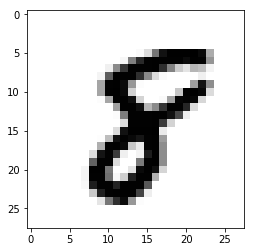

In [9]:
import matplotlib.pyplot as plt
idx = 777
print(y_train[idx])
plt.imshow(x_train[idx], cmap="Greys")

In [10]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape = ',x_train.shape)

x_train shape =  (60000, 28, 28, 1)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

Using TensorFlow backend.


In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 25s 419us/step - loss: 0.2183 - acc: 0.9335
Epoch 2/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.0875 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0613 - acc: 0.9806
Epoch 4/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0461 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0371 - acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0317 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.0253 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.0237 - acc: 0.9916
Epoch 9/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0205 - acc: 0.9929
Epoch 10/10
60000/60000 [==============================] - 16s 266us/step - loss: 

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 147us/step


[0.05884153150126622, 0.9858]